In [3]:
import networkx as nx 
import matplotlib.pyplot as plt 
import random 
import numpy
from collections import defaultdict 
import heapq
import timeit
!pip install bellmanford
import bellmanford as bf

  Created wheel for bellmanford: filename=bellmanford-0.2.1-cp36-none-any.whl size=5037 sha256=79de3f5c26d018f329ffa6db675443fe969e8856847681ee7d675ada664a1fcd
  Stored in directory: /root/.cache/pip/wheels/20/61/3e/dd8db6229092c23e25793b7f2da494b31d870b73d44b4440d6
Successfully built bellmanford


In [4]:
def get_AdjMatrix(n, qty_edge_required):
  adjMatrix = numpy.zeros((n, n))
  qty_edge = 0
  while qty_edge < qty_edge_required:
    i = numpy.random.randint(0, n)
    j = numpy.random.randint(0, n)
    if i != j and adjMatrix[i][j] == 0:
      adjMatrix[i][j] = numpy.random.randint(0, 100)
      adjMatrix[j][i] = adjMatrix[i][j]
      qty_edge += 1
  return adjMatrix

def convert(adjMatrix): 
    adjList = {}
    for i in range(len(adjMatrix)): 
      temp = {}
      for j in range(len(adjMatrix[i])): 
        if adjMatrix[i][j] != 0: 
          temp["{0}".format(j)] = adjMatrix[i][j]
        else:
          temp["{0}".format(j)] = 0
      adjList["{0}".format(i)] = temp 
    return adjList
    
def dijkstra(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    return distances

def bellman_ford(G, start):
  result = {}
  n = len(G)
  for i in range(0, start):
    result["{0}".format(i)] = (bf.bellman_ford(G, source=start, target=i))[0]
  for i in range(start, n):
    result["{0}".format(i)] = (bf.bellman_ford(G, source=start, target=i))[0]
  return(result)

def dist(a, b):
  (x1, y1) = a
  (x2, y2) = b
  return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
def remove_node(graph, how_many):
  for i in range(how_many):
    random_node = random.choice(list(graph.nodes))
    graph.remove_node(random_node)
  return graph

def get_visualization(adjMatrix):
  n = len(adjMatrix)
  G = nx.Graph(adjMatrix)
  pos = nx.random_layout(G)
  plt.figure(3,figsize=(15,7))
  labels = {}
  for k in range(n):
    labels[k] = "{0}".format(k)

  nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")
  nx.draw_networkx_edge_labels(G, pos)
  nx.draw(G, pos, node_size = 300, node_color = "darkgreen", edge_color = "black")


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start node for both algorithms:  2
Result: 
 For Dijkstra's algorithm:  	 {2: [2], 3: [2, 3], 11: [2, 11], 83: [2, 3, 83], 67: [2, 11, 67], 45: [2, 11, 67, 45], 49: [2, 11, 67, 49], 90: [2, 11, 67, 90], 10: [2, 11, 67, 90, 10], 59: [2, 11, 67, 90, 59], 25: [2, 11, 67, 90, 10, 25], 88: [2, 11, 67, 45, 88], 96: [2, 11, 67, 45, 96], 7: [2, 11, 67, 45, 96, 7], 33: [2, 11, 67, 45, 96, 33], 44: [2, 11, 67, 45, 96, 44], 87: [2, 11, 67, 90, 10, 25, 87], 53: [2, 11, 67, 45, 96, 7, 53], 78: [2, 11, 67, 45, 96, 7, 78], 23: [2, 11, 67, 45, 96, 33, 23], 37: [2, 11, 67, 90, 10, 25, 87, 37], 81: [2, 11, 67, 45, 96, 7, 53, 81], 30: [2, 11, 67, 45, 96, 7, 78, 30], 60: [2, 11, 67, 45, 96, 7, 78, 60], 97: [2, 11, 67, 45, 96, 7, 53, 81, 97], 8: [2, 11, 67, 45, 96, 7, 78, 60, 8], 69: [2, 11, 67, 45, 96, 7, 78, 60, 69], 98: [2, 11, 67, 45, 96, 7, 78, 60,

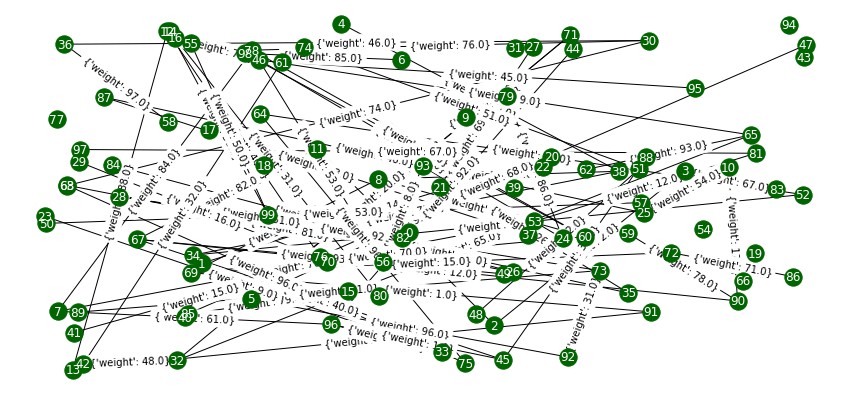

In [12]:
# Main cell
n = 100
qty_edge_required = 81
start = 2
adjMatrix = get_AdjMatrix(n, qty_edge_required)
G = nx.Graph(adjMatrix)
nx.set_edge_attributes(G, {e: adjMatrix[e[0]][e[1]] for e in G.edges()}, "weight")
get_visualization(adjMatrix)

print(adjMatrix)
print("Start node for both algorithms: ", start)
print("Result:", "\n", 
      "For Dijkstra's algorithm: ", "\t", nx.single_source_dijkstra_path(G, start, weight='weight'), "\n", 
      "For Bellman-Ford algorithm: ", nx.single_source_bellman_ford_path(G, start, weight='weight'), "\n",
      )

def my_function1():
  start = random.choice(list(G))
  #print("start", start)
  nx.single_source_dijkstra_path(G, start, weight='weight')
average_time_dijkstra = timeit.timeit(my_function1, number = 10) / 10
print("Average time: ",average_time_dijkstra, "for 10 attempts of Dijkstra's algorithm")

def my_function2():
  start = random.choice(list(G))
  #print("start", start)
  nx.single_source_bellman_ford_path(G, start, weight='weight')
average_time_bellman = timeit.timeit(my_function2, number = 10) / 10
print("Average time: ", average_time_bellman, "for 10 attempts of Bellman-Ford algorithm")

Start (8, 5) target (8, 5)
Shortest path between nodes (8, 5) and (8, 5) is 
[(8, 5)]
Start (6, 6) target (5, 7)
Shortest path between nodes (6, 6) and (5, 7) is 
[(6, 6), (6, 7), (5, 7)]
Start (4, 8) target (1, 4)
Shortest path between nodes (4, 8) and (1, 4) is 
[(4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4)]
Start (7, 2) target (4, 4)
Shortest path between nodes (7, 2) and (4, 4) is 
[(7, 2), (6, 2), (5, 2), (4, 2), (4, 3), (4, 4)]
Start (4, 2) target (8, 2)
Shortest path between nodes (4, 2) and (8, 2) is 
[(4, 2), (5, 2), (6, 2), (7, 2), (8, 2)]
0.00030044800000723627


(None,)

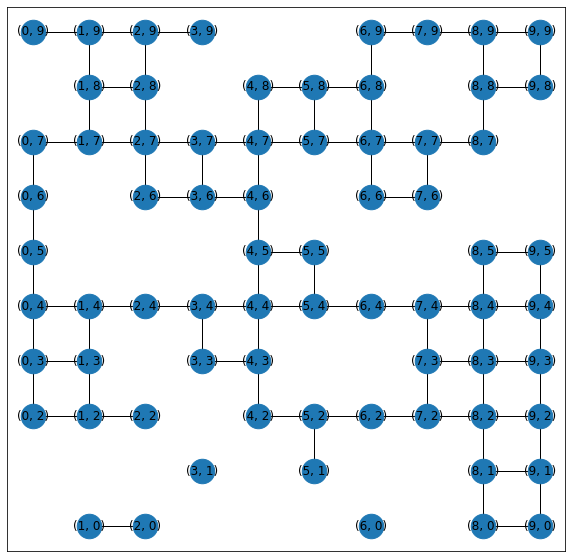

In [10]:
N=10
G = nx.grid_graph(dim=[N, N]) # nodes are two-tuples (x,y)
#nx.set_edge_attributes(G, {e: e[1][0] * 2 for e in G.edges()}, "W") #!!! добавить веса в ребра
remove_node(G, 30)
def my_function3():
  start = random.choice(list(G.nodes)) 
  target = random.choice(list(G.nodes))
  print("Start", start, "target", target)
  print("Shortest path between nodes {0} and {1} is ".format(start, target))
  try:
    shortest_path = (nx.astar_path(G, start, target, heuristic=dist, weight="W"))
    print(shortest_path)
  except:
    print("Path not exist")

average_time_astar = timeit.timeit(my_function3, number = 5) / 5
print(average_time_astar)

plt.figure(3,figsize=(10,10))
pos = dict( (n, n) for n in G.nodes() ) #Dictionary of all positions
#labels = dict( ((i, j), i + (N-1-j) * N ) for i, j in G.nodes() )
#nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")
#nx.draw_networkx_edge_labels(G, pos)
nx.draw_networkx(G, pos = pos, node_size=600), #node_color=color_map)
#print(nx.astar_path(G, start, end))

In [ ]:
color_map = []
for node in G:
  if node not in shortest_path:
    color_map.append('blue')
  elif node == start or node == target:
    color_map.append('green')
  else:
    color_map.append('red')

In [ ]:
import networkx as nx
from random import choice

g = nx.Graph()
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(1,4)
g.add_edge(1,5)
g.add_edge(5,6)

random_node = choice(list(g.nodes))
print(random_node)

5
